# **Heart Disease Prediction using Machine Learning**

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Loading the heart data set in Pandas
heart_data = pd.read_csv("./Processed.csv")

In [4]:
# printing number of rows and columns in the dataset
heart_data.shape

(319795, 18)

In [5]:
# Remove duplicates

heart_data = heart_data.drop_duplicates()


In [6]:
# printing number of rows and columns in the dataset
heart_data.shape

(301717, 18)

In [7]:
# printing first 5 rows of the dataset
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [8]:
# printing first 5 rows of the dataset
heart_data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,1,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,1,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,1,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,1,0,0,3,12.0,0,0,0
319794,0,46.56,0,0,0,0.0,0.0,0,0,13,1,0,1,3,8.0,0,0,0


In [9]:
# fetching information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     301717 

In [10]:
# checking for missing values
heart_data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
# drop null value

# dropping null values
heart_data = heart_data.dropna()


In [12]:
# checking for missing values
heart_data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
# statistical measures about the data
heart_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,0.090353,28.441970,0.422267,0.071527,0.039984,3.572298,4.121475,0.147009,0.470792,7.509408,0.541342,0.204858,0.763669,3.553628,7.084559,0.141361,0.039030,0.097084
std,0.286687,6.468134,0.493921,0.257704,0.195923,8.140656,8.128288,0.354115,0.499147,3.584510,1.130549,0.508564,0.424828,1.047515,1.467122,0.348394,0.193667,0.296073
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.650000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,13.000000,5.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


In [14]:
# checking the distribution of HeartDisease Variable
heart_data['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

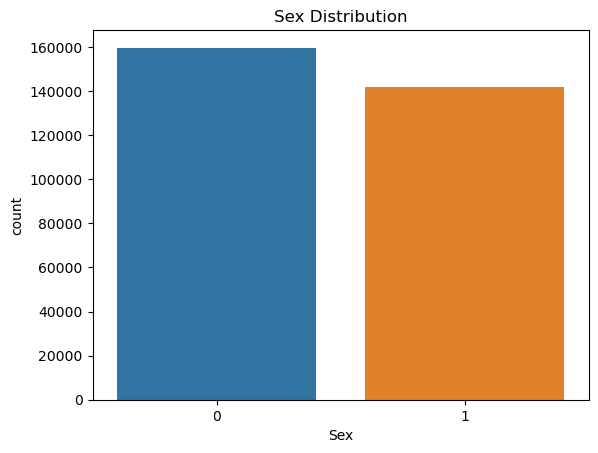

In [15]:
# Plot graph for sex type

sns.countplot(x='Sex',data=heart_data)
plt.title('Sex Distribution')
plt.show()

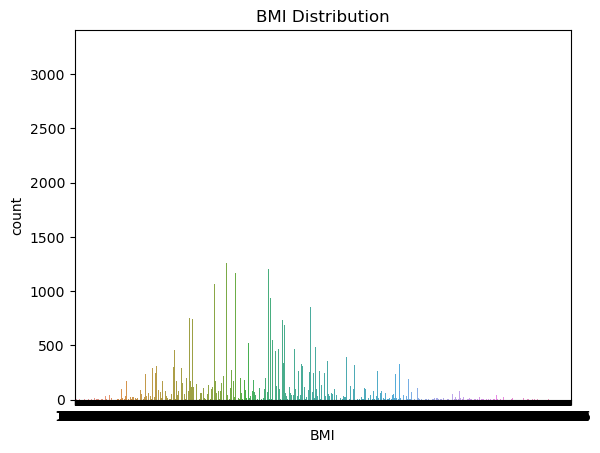

In [16]:
# graph for chest pain type

sns.countplot(x='BMI',data=heart_data)
plt.title('BMI Distribution')
plt.show()

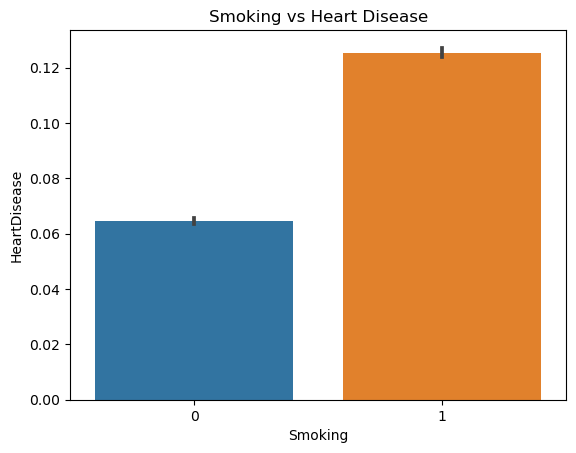

In [17]:
# smoking vs heartdisease graph

sns.barplot(x='Smoking', y='HeartDisease', data=heart_data)
plt.title('Smoking vs Heart Disease')
plt.show()


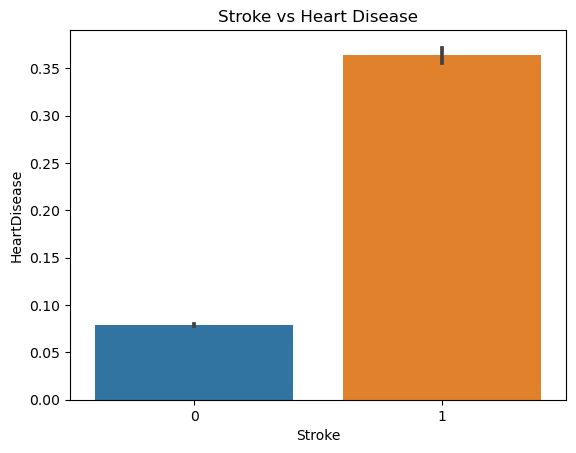

In [18]:
# stroke vs heart disease

sns.barplot(x='Stroke', y='HeartDisease', data=heart_data)
plt.title('Stroke vs Heart Disease')
plt.show()


In [19]:
heart_data = heart_data.drop(['SleepTime'], axis=1)

In [20]:
heart_data = heart_data.drop(['DiffWalking'], axis=1)

In [21]:
heart_data = heart_data.drop('Race', axis=1)

In [22]:
heart_data = heart_data.drop(['GenHealth'], axis=1)

In [23]:
heart_data = heart_data.drop(['SkinCancer'], axis=1)

In [24]:
#separting the Features and the Labels
Features = heart_data.drop(columns='HeartDisease', axis=1)
Labels = heart_data['HeartDisease']

In [25]:
print(Features)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0             3.0          30.0   
1       20.34        0                0       1             0.0           0.0   
2       26.58        1                0       0            20.0          30.0   
3       24.21        0                0       0             0.0           0.0   
4       23.71        0                0       0            28.0           0.0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0             7.0           0.0   
319791  29.84        1                0       0             0.0           0.0   
319792  24.24        0                0       0             0.0           0.0   
319793  32.81        0                0       0             0.0           0.0   
319794  46.56        0                0       0             0.0           0.0   

        Sex  AgeCategory  D

In [26]:
print(Labels)

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64


In [28]:
#Spliting the data into training and testing set(ratio -> 80:20 )
Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=3)

In [29]:
print(Features.shape, Features_train.shape, Features_test.shape)

(301717, 12) (241373, 12) (60344, 12)


In [30]:
print(Labels.shape, Labels_train.shape, Labels_test.shape)

(301717,) (241373,) (60344,)


In [31]:
model1 = LogisticRegression()

In [32]:
# Training our model with Training data using LogisticRegression
model1.fit(Features_train, Labels_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Checking accuracy on training data through model1
Features_train_prediction1 = model1.predict(Features_train)
training_data_accuracy1 = accuracy_score(Features_train_prediction1, Labels_train)

In [34]:
print('Accuracy on Training data : ', training_data_accuracy1)

Accuracy on Training data :  0.9101349363847655


In [35]:
# Checking accuracy on test data
Features_test_prediction1 = model1.predict(Features_test)
test_data_accuracy1 = accuracy_score(Features_test_prediction1, Labels_test)
matrix1=confusion_matrix(Features_test_prediction1, Labels_test)

In [72]:
print('Accuracy on Testing data : ', test_data_accuracy1)
print("Precision:", precision_score(Features_test_prediction1, Labels_test))
print('Confusion Matrix',matrix1)

Accuracy on Testing data :  0.9096181890494498
Precision: 0.07721936903888481
Confusion Matrix [[54469  5031]
 [  423   421]]


In [37]:
model2 = DecisionTreeClassifier()

In [38]:
# Training our model with Training data using DecisionTree
model2.fit(Features_train, Labels_train)

DecisionTreeClassifier()

In [39]:
# Checking accuracy on training data through model1
Features_train_prediction2 = model2.predict(Features_train)
training_data_accuracy2 = accuracy_score(Features_train_prediction2, Labels_train)

In [40]:
print('Accuracy on Training data : ', training_data_accuracy2)

Accuracy on Training data :  0.9810707908506751


In [69]:
# Checking accuracy on test data
Features_test_prediction2 = model2.predict(Features_test)
test_data_accuracy2 = accuracy_score(Features_test_prediction2, Labels_test)
matrix2=confusion_matrix(Features_test_prediction2, Labels_test)

In [71]:
print('Accuracy on Testing data : ', test_data_accuracy2)
print("Precision:", precision_score(Features_test_prediction2, Labels_test))
print('Confusion Matrix',matrix2)


Accuracy on Testing data :  0.8687193424366962
Precision: 0.21184886280264123
Confusion Matrix [[51267  4297]
 [ 3625  1155]]


In [43]:
model3 = RandomForestClassifier()

In [44]:
# Training our model with Training data using LogisticRegression
model3.fit(Features_train, Labels_train)

RandomForestClassifier()

In [45]:
# Checking accuracy on training data through model3
Features_train_prediction3 = model3.predict(Features_train)
training_data_accuracy3 = accuracy_score(Features_train_prediction3, Labels_train)

In [46]:
print('Accuracy on Training data : ', training_data_accuracy3)

Accuracy on Training data :  0.9810045034034461


In [47]:
# Checking accuracy on test data
Features_test_prediction3 = model3.predict(Features_test)
test_data_accuracy3 = accuracy_score(Features_test_prediction3, Labels_test)
matrix3=confusion_matrix(Features_test_prediction3, Labels_test)

In [73]:
print('Accuracy on Testing data : ', test_data_accuracy3)
print("Precision:", precision_score(Features_test_prediction3, Labels_test))
print('Confusion Matrix',matrix3)

Accuracy on Testing data :  0.8899310619117062
Precision: 0.15260454878943508
Confusion Matrix [[52870  4620]
 [ 2022   832]]


In [52]:
# saving model data

import pickle

with open('heart_disease_model1.pkl', 'wb') as file:
    pickle.dump(model1, file)

with open('heart_disease_model2.pkl', 'wb') as file:
    pickle.dump(model2, file)

with open('heart_disease_model3.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [75]:
import joblib

# Save the models
joblib.dump(model1, 'heart_disease_model1.joblib')
joblib.dump(model2, 'heart_disease_model2.joblib')
joblib.dump(model3, 'heart_disease_model3.joblib')


['heart_disease_model3.joblib']

In [80]:
import sklearn
print(sklearn.__version__)

1.2.2


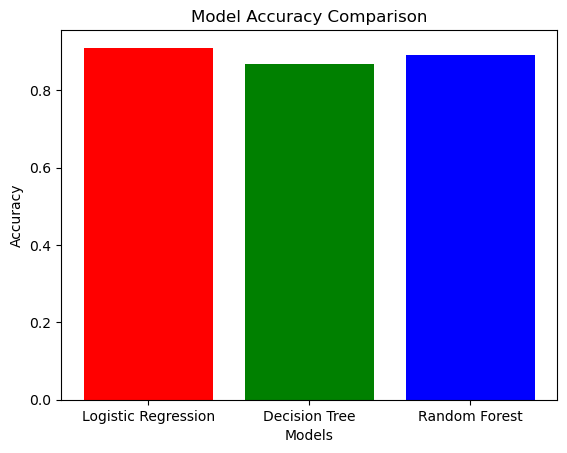

In [76]:
# Comparing accuracy of all models

model_accuracy = [test_data_accuracy1, test_data_accuracy2, test_data_accuracy3]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

plt.bar(model_names, model_accuracy, color=['red', 'green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


In [78]:
#Testing the model with individual data
input_data = (29.6,0,0,0,3.0,5.0,0,8,1,0,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Congrats ! You do not have Heart Disease')
else:
  print('Sad to say that you has Heart Disease')

[0]
Congrats ! You do not have Heart Disease


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
#Testing the model with individual data
input_data = (29.9,1,0,1,15.0,6.0,1,9,0,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Congrats ! You do not have Heart Disease')
else:
  print('Sad to say that you has Heart Disease')

[1]
Sad to say that you has Heart Disease


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
